# Linear Classification

After explored how a linear regression works [here](https://github.com/R-Stefano/Machine-Learning/blob/master/linearRegression/Linear%20regression.ipynb), now we explore how a linear classification works. In the linear regression we want create a model that predicts the house price based on the lotsize. Now, we want to classify the houses given the lotsize if they have *fullbase* or not.

In [114]:
import pandas as pd
database=pd.read_csv("Housing.csv")
inputData=database['lotsize']
labels=database['fullbase']
labels.head()

0    yes
1     no
2     no
3     no
4     no
Name: fullbase, dtype: object

We can't feed words in our model, so we need to convert them, in this case we can just encode "yes"=1 and "no"=0

In [115]:
labelsEncoded=[]
for idx in range(len(labels)):
    if labels[idx]=="yes":
        labelsEncoded.append(1)
    else:
        labelsEncoded.append(0)
        
labelsEncoded[:5]
    

[1, 0, 0, 0, 0]

The process is basically the same, the only difference is that now the output must be spread between 0-1 where 1 means that the model is certain that the house have the fullbase, and 0 means that is certain that the house hasn't. In order to do so, we need an **activation function** called sigmoid which map the output of the network between 0 and 1. The output of the model that are going to be fed into an activation function is called **logit** and is rappresented by the letter *z*.

<img src="sigmoid.png">

In [116]:
from math import e

def sigmoid(z):
    return (1/(1+e**-z))


Now, we define the hyperparameters such as epochs and learning rate, the initial values of the parameters *a* and *b*, the lists what will stores the data for graphic rappresentations and finally the model

In [117]:
from sklearn import preprocessing

x=preprocessing.scale(inputData)
y=labelsEncoded

a=0
b=0

epochs=10000
learningRate=0.01
N=len(x)

errors=[]
aList=[]
bList=[]
epochsList=[]

for epoch in range(epochs):
    error=0
    deriv_a=0
    deriv_b=0
    for example in range(N):
        logit=a*x[example] + b
        output=sigmoid(logit)

        error += ((y[example] - output)**2)/N
        
        deriv_a+=-(2/N)*x[example]*(y[example] - output)
        deriv_b+=-(2/N)*(y[example] - output)
        
    a= a - (learningRate*deriv_a)
    b= b - (learningRate*deriv_b)
    
    errors.append(error)
    aList.append(deriv_a)
    bList.append(deriv_b)
    epochsList.append(epoch)

print("a: ", a)
print("b: ", b)
print("cost: ", errors[-1])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


a:  0.09806695401656543
b:  -0.621205165664649
cost:  0.22694412291725993


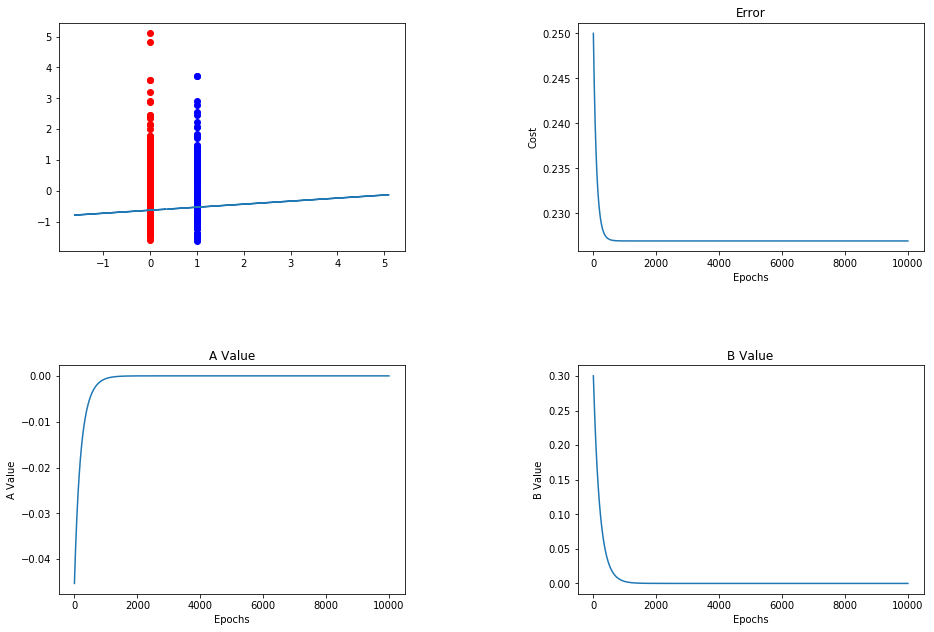

In [118]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

f, ((ax1,ax2), (ax3,ax4))=plt.subplots(2,2)
for i in range(N):
    if y[i]==1:
        col='blue'
    else:
        col='red'
        
    ax1.plot(y[i], x[i], marker='o', color=col)

ax1.plot(x, a*x + b, '-')
ax2.plot(epochsList,errors,  '-')
ax2.set_title("Error")
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Cost')

ax3.plot(epochsList, aList,  '-')
ax3.set_title("A Value")
ax3.set_xlabel('Epochs')
ax3.set_ylabel('A Value')

ax4.plot(epochsList, bList,  '-')
ax4.set_title("B Value")
ax4.set_xlabel('Epochs')
ax4.set_ylabel('B Value')

f.subplots_adjust(hspace=0.5, wspace=0.5)
f.set_size_inches(15.5, 10.5)